In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN
from sklearn.metrics import mean_squared_error

In [4]:
# 1. AAME.csv 불러오기
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/AAME.csv"
df = pd.read_csv(url)

In [6]:
# 2. 필요한 열 추출 및 결측치 제거
df = df[['Open', 'Low', 'High', 'Close']].dropna()

In [8]:
# 3. 스케일링
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

In [10]:
# 4. 시퀀스 데이터 생성 함수
def make_sequence(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window, :3])  # Open, Low, High
        y.append(data[i+window, 3])     # Close
    return np.array(X), np.array(y)

In [12]:
# 5. 윈도우 사이즈 및 데이터 분리
WINDOW = 10
TEST_SIZE = 2000

X_all, y_all = make_sequence(scaled, WINDOW)
X_train, X_test = X_all[:-TEST_SIZE], X_all[-TEST_SIZE:]
y_train, y_test = y_all[:-TEST_SIZE], y_all[-TEST_SIZE:]

In [14]:
# RNN 모델 정의
rnn_model = Sequential()
rnn_model.add(SimpleRNN(16, input_shape=(WINDOW, 3), activation='tanh'))
rnn_model.add(Dense(1))

rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# 예측
rnn_pred = rnn_model.predict(X_test)

# 역스케일링
rnn_pred_inv = scaler.inverse_transform(
    np.concatenate([np.zeros((len(rnn_pred), 3)), rnn_pred], axis=1))[:, 3]
y_test_inv = scaler.inverse_transform(
    np.concatenate([np.zeros((len(y_test), 3)), y_test.reshape(-1, 1)], axis=1))[:, 3]

rnn_mse = mean_squared_error(y_test_inv, rnn_pred_inv)
print(f"📊 RNN MSE: {rnn_mse:.6f}")

2025-05-27 14:50:27.880532: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-05-27 14:50:27.880597: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-05-27 14:50:27.880607: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-05-27 14:50:27.880632: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-27 14:50:27.880648: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, pref

Epoch 1/10


2025-05-27 14:50:29.243745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-05-27 14:50:29.246890: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


253/253 ━━━━━━━━━━━━━━━━━━━━ 36s 126ms/step - loss: 0.0204
Epoch 2/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 31s 124ms/step - loss: 7.0450e-04
Epoch 3/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 32s 126ms/step - loss: 5.2421e-04
Epoch 4/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 31s 122ms/step - loss: 4.1938e-04
Epoch 5/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 32s 126ms/step - loss: 3.1559e-04
Epoch 6/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 32s 127ms/step - loss: 2.8541e-04
Epoch 7/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 34s 134ms/step - loss: 2.6051e-04
Epoch 8/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 35s 138ms/step - loss: 2.2944e-04
Epoch 9/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 33s 131ms/step - loss: 2.2258e-04
Epoch 10/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 35s 137ms/step - loss: 1.9922e-04
 3/63 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step  

2025-05-27 14:55:59.278067: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step
📊 RNN MSE: 0.017909


In [16]:
# LSTM 모델 정의
lstm_model = Sequential()
lstm_model.add(LSTM(16, input_shape=(WINDOW, 3), activation='tanh'))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# 예측
lstm_pred = lstm_model.predict(X_test)

# 역스케일링
lstm_pred_inv = scaler.inverse_transform(
    np.concatenate([np.zeros((len(lstm_pred), 3)), lstm_pred], axis=1))[:, 3]

lstm_mse = mean_squared_error(y_test_inv, lstm_pred_inv)
print(f"📊 LSTM MSE: {lstm_mse:.6f}")

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - loss: 0.0081
Epoch 2/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 1.9887e-04
Epoch 3/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 1.8145e-04
Epoch 4/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 1.7900e-04
Epoch 5/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 1.9247e-04
Epoch 6/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - loss: 1.5545e-04
Epoch 7/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 1.5139e-04
Epoch 8/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 1.5194e-04
Epoch 9/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 1.5309e-04
Epoch 10/10
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 1.4360e-04
 9/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step   

2025-05-27 14:57:38.149951: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
📊 LSTM MSE: 0.013318


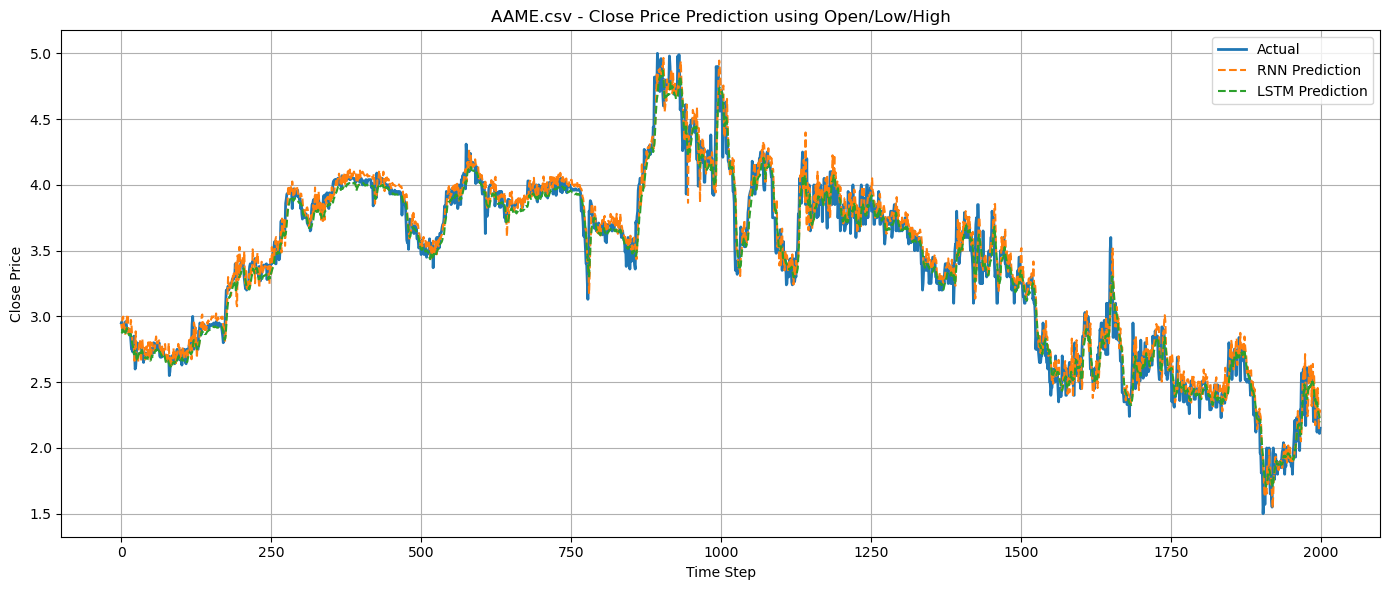

In [18]:
plt.figure(figsize=(14, 6))
plt.plot(y_test_inv, label='Actual', linewidth=2)
plt.plot(rnn_pred_inv, label='RNN Prediction', linestyle='--')
plt.plot(lstm_pred_inv, label='LSTM Prediction', linestyle='--')
plt.title('AAME.csv - Close Price Prediction using Open/Low/High')
plt.xlabel('Time Step')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()